# Imports

In [5]:
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
np.random.seed(0)

# Data

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualization

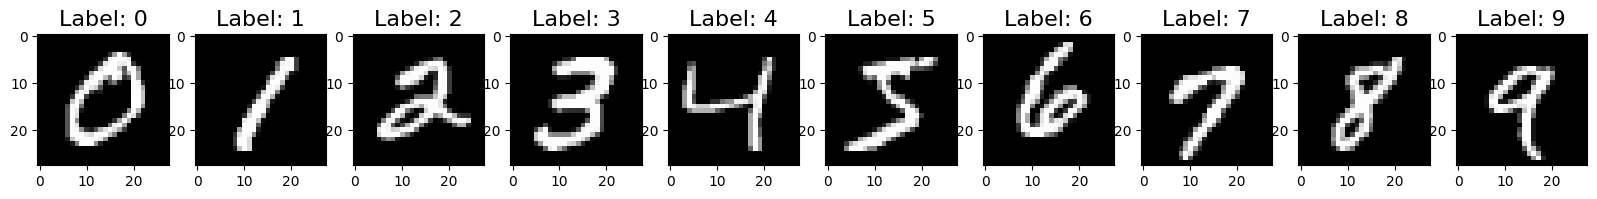

In [8]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label: {}".format(i), fontsize = 16)

In [9]:
for i in range (num_classes):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
for i in range (num_classes):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Data Preparation

In [12]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print(x_train.shape)

(60000, 784)


# Model Creation: Fully Connected Neural Network

In [15]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784, ), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

d:\Other\Python3_10_0\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
batch_size = 512
epochs = 10
history = model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7046 - loss: 1.0271 - val_accuracy: 0.9329 - val_loss: 0.2246
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9278 - loss: 0.2463 - val_accuracy: 0.9518 - val_loss: 0.1557
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9481 - loss: 0.1778 - val_accuracy: 0.9611 - val_loss: 0.1244
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9596 - loss: 0.1335 - val_accuracy: 0.9672 - val_loss: 0.1112
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9679 - loss: 0.1095 - val_accuracy: 0.9701 - val_loss: 0.0975
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9725 - loss: 0.0940 - val_accuracy: 0.9721 - val_loss: 0.0906
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9769 - loss: 0.0788 - val_accuracy: 0.9727 - val_loss: 0.0833
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9798 - loss: 0.0674 - val_accuracy: 0.

# Evaluation

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9699 - loss: 0.0927
Test Loss: 0.08213496953248978, Test Accuracy: 0.9733999967575073


In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
[[6.8851492e-08 1.9783160e-06 1.1452952e-05 ... 9.9986839e-01
  9.6231467e-08 4.3286118e-06]
 [3.8971004e-09 1.2812249e-05 9.9998498e-01 ... 1.0400894e-08
  1.0134285e-06 1.5985654e-12]
 [1.7915196e-05 9.9472564e-01 1.0776072e-03 ... 3.3182965e-03
  3.1970709e-04 1.1135507e-05]
 ...
 [6.1698437e-08 2.4787383e-07 5.8869665e-09 ... 7.7680588e-06
  1.6857878e-06 2.3890230e-05]
 [7.9343785e-09 5.9897771e-09 4.7299087e-12 ... 8.3350338e-10
  4.7598655e-06 7.8535667e-10]
 [4.7590385e-07 7.1568973e-10 5.2682800e-08 ... 2.2992386e-11
  3.0834849e-10 6.6470388e-12]]
[7 2 1 ... 4 5 6]


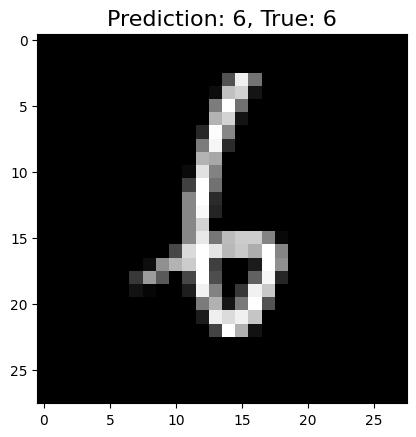

In [19]:
#Sample Testing
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Prediction: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')

# Confusion Matrix

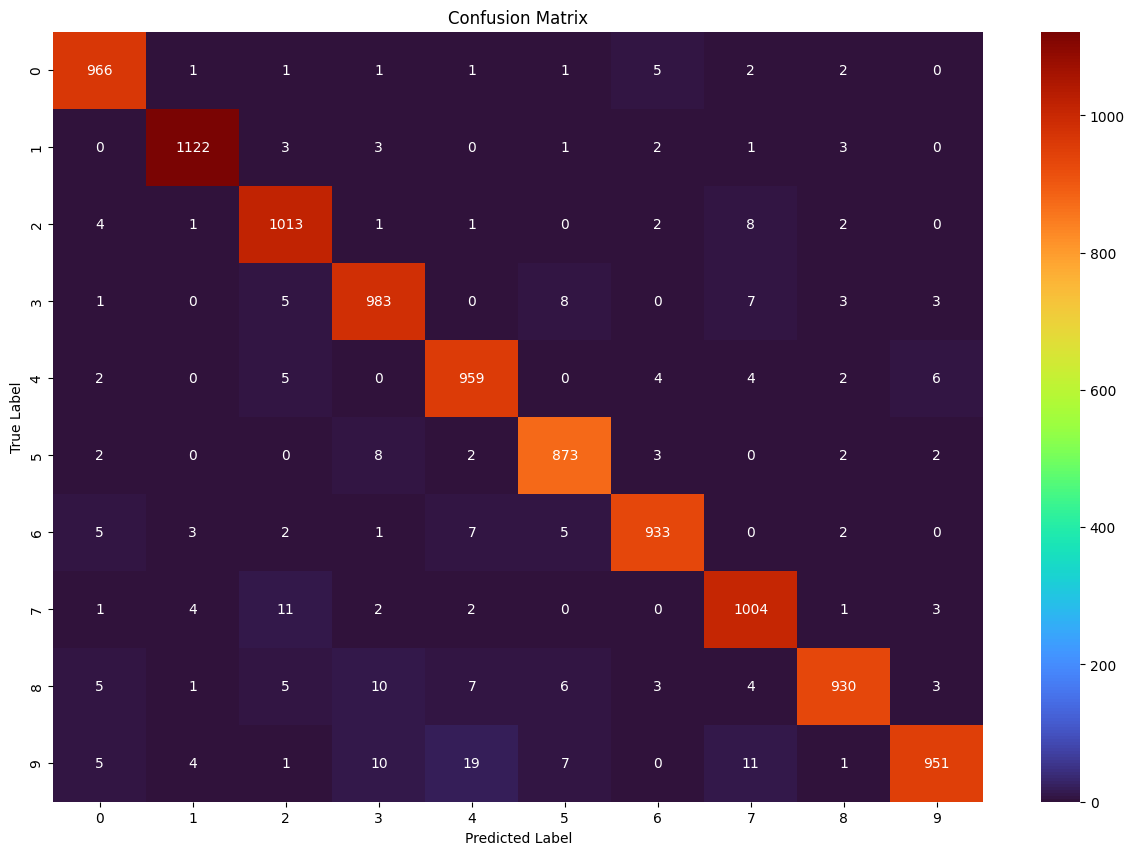

In [20]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = "turbo")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investagion of Errors

In [21]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [22]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-10:]

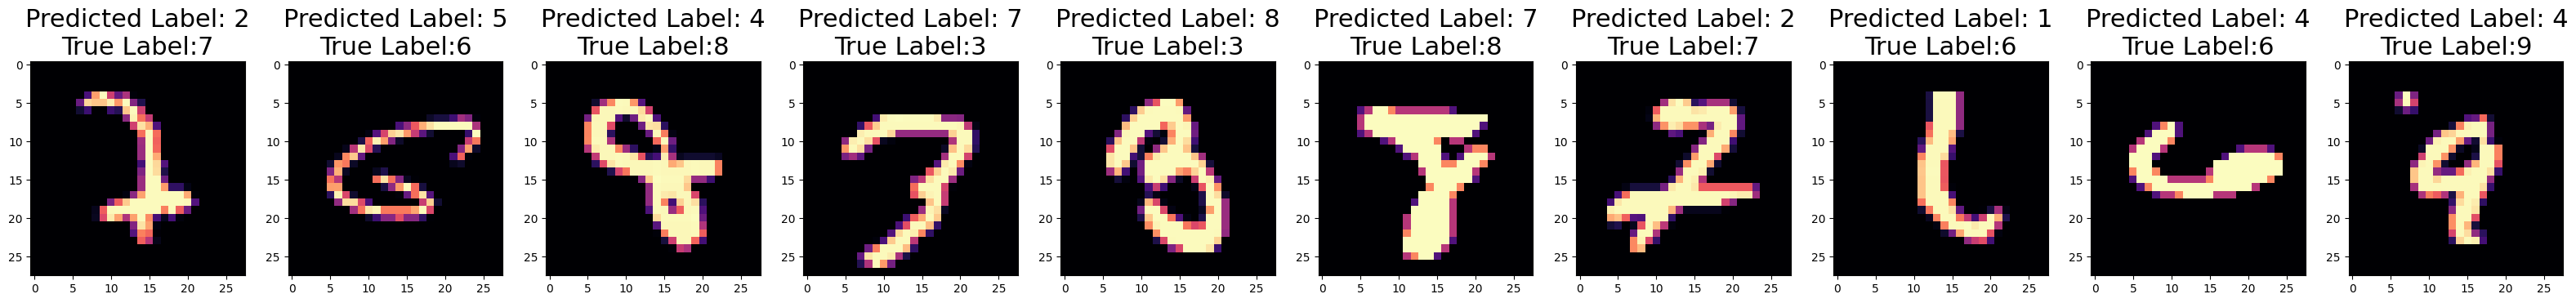

In [23]:
# Showing top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize = (40,40))

for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28, 28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap = 'magma')
    ax[i].set_title("Predicted Label: {}\nTrue Label:{}".format(y_p, y_t), fontsize = 22)

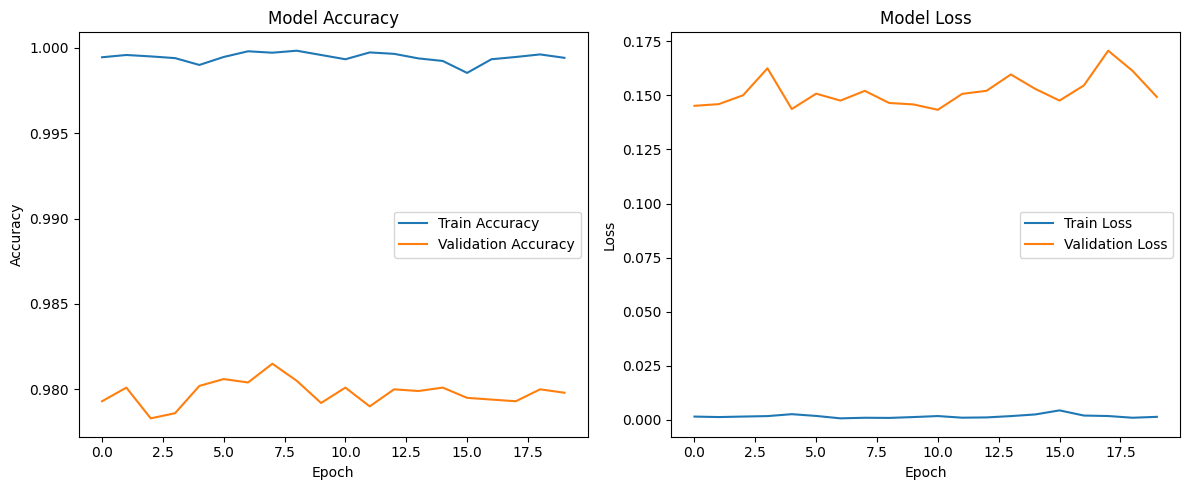

In [225]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


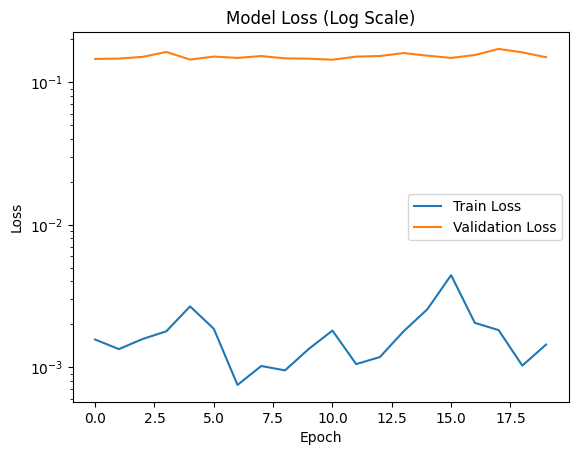

In [226]:
# Log Scale
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.yscale('log')  # <- log scale for Y-axis
plt.title('Model Loss (Log Scale)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
